In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

In [3]:
data = pd.read_csv("./heart_disease_dataset.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
# More descriptive names
data.rename(columns = {
    'cp' : 'chest_pain_type',
    'trestbps' : 'resting_blood_pressure',
    'chol' : 'cholesterol',
    'fbs' : 'fasting_blood_sugar_over_120',
    'restecg' : 'resting_cardiographic_results',
    'thalach' : 'max_heartrate',
    'exang' : 'induced_angina',
    'ca' : 'num_maj_vessels_flourosopy',
    'thal' : 'blood_characterization',
    "num" : "heart_desease"
}, inplace = True)

In [6]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar_over_120,resting_cardiographic_results,max_heartrate,induced_angina,oldpeak,slope,num_maj_vessels_flourosopy,blood_characterization,heart_desease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Two featues have negative values, might be erroneous

In [7]:
np.sum((data.num_maj_vessels_flourosopy < 0) | (data.blood_characterization < 0))

6

6 observations have negative values in either num_maj_vessels_flourosopy or blood_characterization
Seems to be missing data. For now, removing given observations

In [8]:
data[(data.num_maj_vessels_flourosopy < 0) | (data.blood_characterization < 0)]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar_over_120,resting_cardiographic_results,max_heartrate,induced_angina,oldpeak,slope,num_maj_vessels_flourosopy,blood_characterization,heart_desease
87,53,0,3,128,216,0,2,115,0,0.0,1,0,-100000,0
166,52,1,3,138,223,0,0,169,0,0.0,1,-100000,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,-100000,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,-100000,1
287,58,1,2,125,220,0,0,144,0,0.4,2,-100000,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [9]:
data = data[(data.num_maj_vessels_flourosopy > 0) & (data.blood_characterization > 0)]

In [10]:
# More descripitve values
data.sex = data.sex.map({0 : "female", 1 : "male"})

data.chest_pain_type = data.chest_pain_type.map({
    1 : "typical angina",
    2 : "atypical angine",
    3: "non-anginal pain",
    4 : "asymptomatic"})


data.resting_cardiographic_results = data.resting_cardiographic_results.map({
    0 : "normal", 
    1 : "abnormality",
    2 : "probable_or_definite"})


data.slope = data.slope.map({1: "upsloping", 
                             2: "flat", 
                             3: "downsloping"})

data.blood_characterization = data.blood_characterization.map({3 : "normal", 
                                                               6 : "fixed defect",
                                                               7 : "reversable defect"})

data.heart_desease = data.heart_desease.astype("bool")
data.fasting_blood_sugar_over_120 = data.fasting_blood_sugar_over_120.astype("bool")
data.induced_angina = data.induced_angina.astype("bool")

In [11]:
# No missing data
data.isnull().sum().sum()

0

In [12]:
numerical_features = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heartrate', 'oldpeak']

categorical_features = [col for col in data.columns if col not in numerical_features] 

No particulary skewed features

In [13]:
for col in numerical_features:
    print('{:22}'.format(col), 
          'Skewness: {:05.2f}'.format(data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:04.2f}'.format(data[col].kurt())  
         )

age                    Skewness: -0.21     Kurtosis: -0.02
resting_blood_pressure Skewness: 00.75     Kurtosis: 1.29
cholesterol            Skewness: 00.43     Kurtosis: 1.30
max_heartrate          Skewness: -0.33     Kurtosis: -0.58
oldpeak                Skewness: 00.90     Kurtosis: 0.69


Out of all numerical features, age, max_heartrate and oldpeak have most profound impact on response

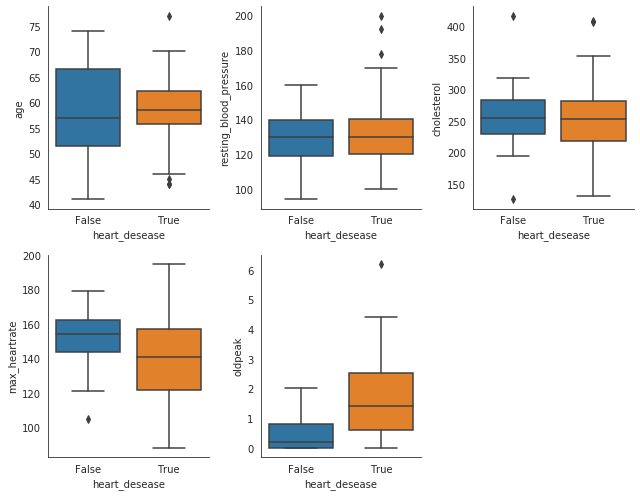

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 7))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    if idx == 5: break
    plt.sca(ax)
    ax = sns.boxplot(x = "heart_desease", y = numerical_features[idx], data=data)
 

fig.delaxes(axes[5]) # Removing empty plot

sns.despine()
plt.tight_layout()
plt.show()

Numerical featues are not heavily correlated

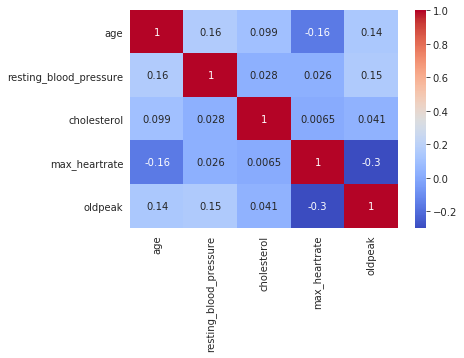

In [15]:
sns.heatmap(data.loc[:, numerical_features].corr(), annot=True, cmap="coolwarm",)

Response classes are not easily separated, based on numerical features.
Distributions for age, max_heartrate and oldpeak are quite differt for patients with and without heart desease.

<Figure size 576x576 with 0 Axes>

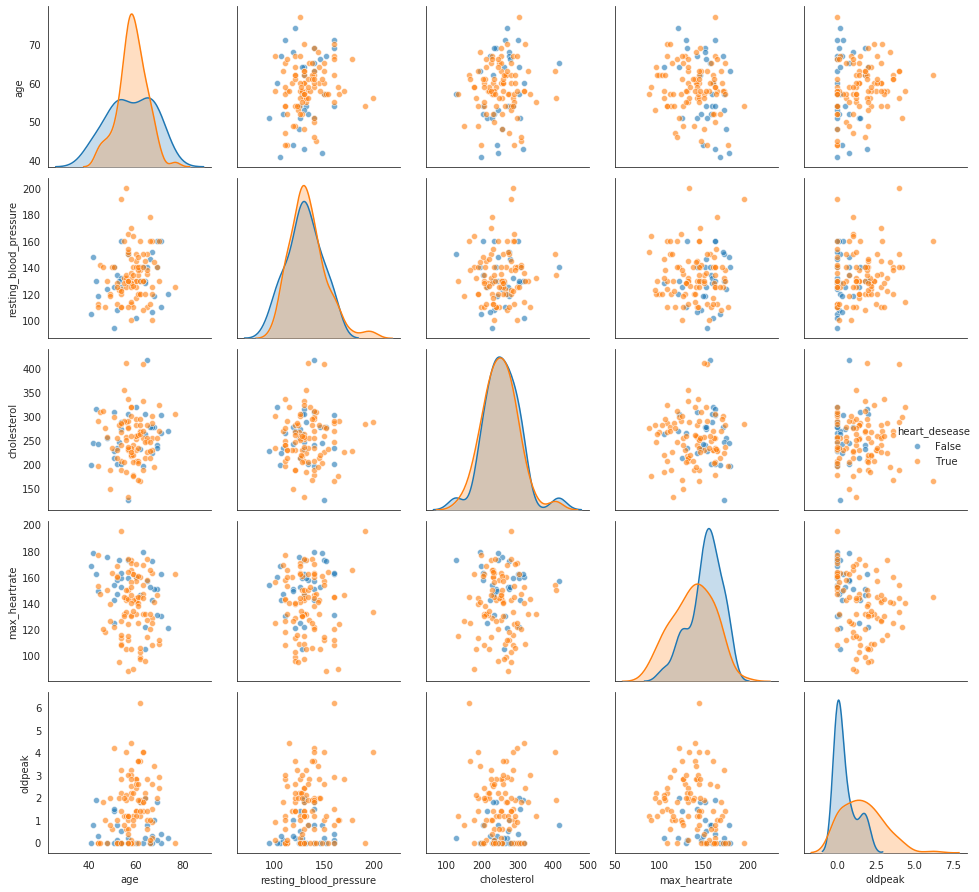

In [16]:
plt.figure(figsize=(8, 8))
sns.pairplot(data.loc[:, numerical_features + ["heart_desease"]], hue="heart_desease",
            plot_kws=dict(alpha=0.6))
plt.tight_layout()

Response value is balances, but some categorical variables are heavily imbalanced

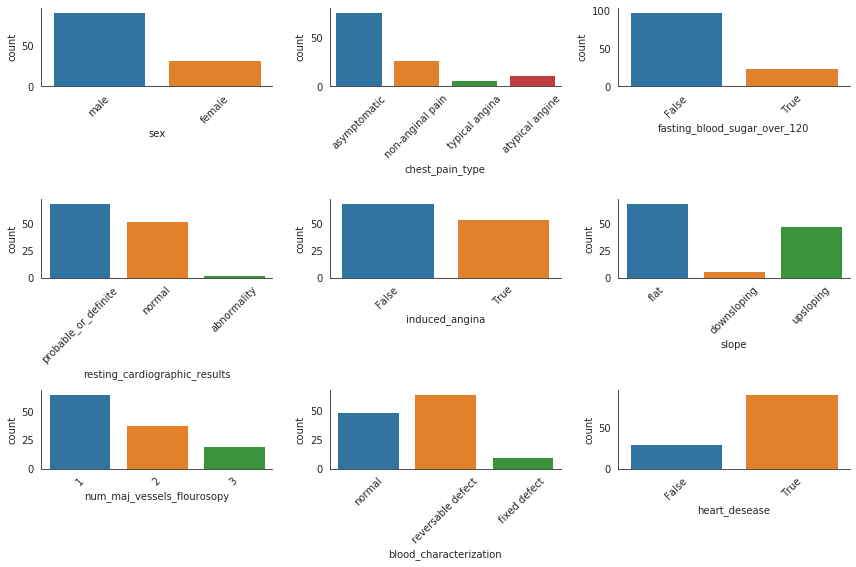

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical_features[idx], data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

For almost all categorical variables there are more patients with heart desease then without.
Notable exceptions: Female patients and patients with normal blood caracterization 

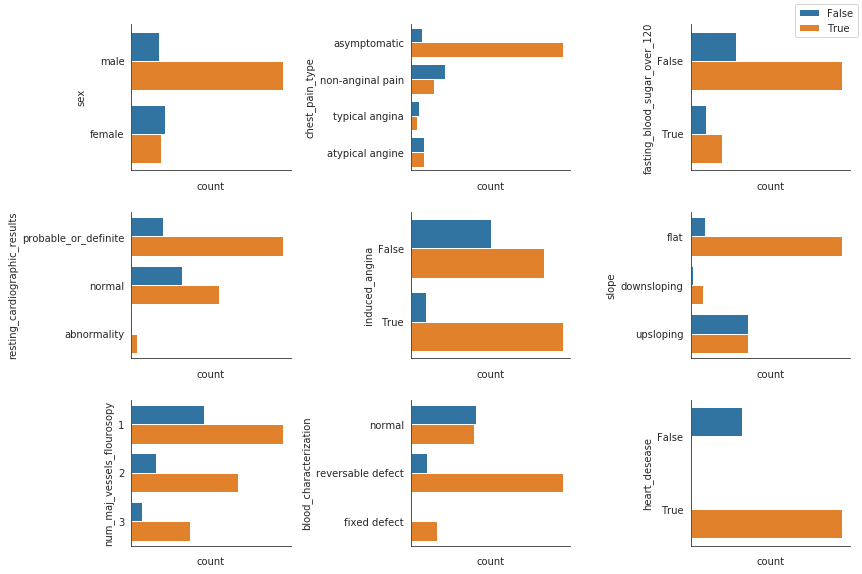

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(y = categorical_features[idx], hue = "heart_desease", data=data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.legend_.remove()
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

sns.despine()
plt.tight_layout()
plt.show()